In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [188]:
reda = pd.read_excel(r'C:\Users\mb22\OneDrive\PhD\Quasar Shared\Data\Outputs\LongTermOutput\RedA.xlsx',
                     header=[0,1])

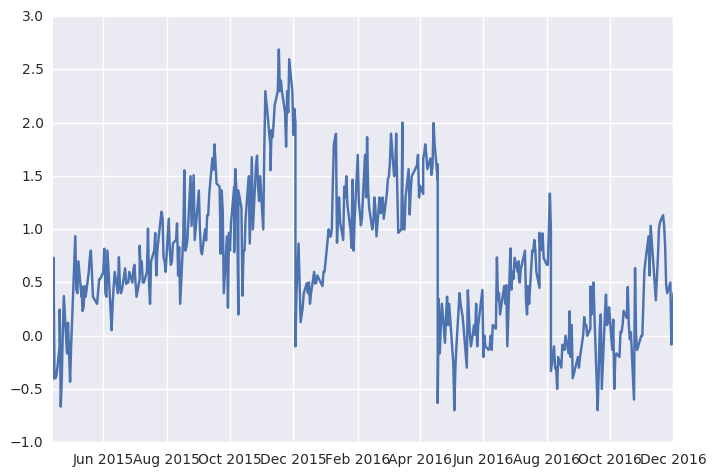

In [347]:
plt.plot(reda['10MV','Date'],reda['10MV','Value'])

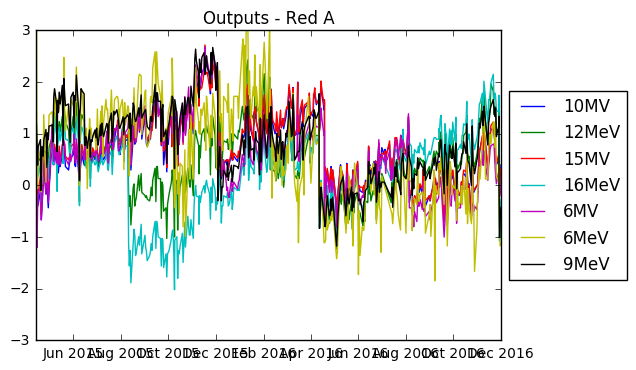

In [190]:
energies = reda.columns.levels[0]

for energy in energies:
    plt.plot(reda[energy,'Date'],reda[energy,'Value'],label=energy)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-3,3)
plt.title('Outputs - Red A')


In [191]:
## look at only the date values
reda.xs('Date',level=1,axis=1)

## strip the time values off
for energy in energies:
    reda[energy,'Date'] = reda[energy,'Date'].apply(lambda x: x.date())
    #df['Date'] = df['Date'].apply(lambda x: x.date())

In [335]:
reda.head()

9MeV               16MeV                 6MV               12MeV  \
         Date   Value        Date   Value        Date   Value        Date   
1  2015-04-14  0.7553  2015-04-14  0.2331  2015-04-14 -0.3000  2015-04-14   
2  2015-04-14  1.2830  2015-04-14  1.0330  2015-04-14  0.8667  2015-04-14   
3  2015-04-15  0.7553  2015-04-15  0.1998  2015-04-15 -1.2000  2015-04-15   
4  2015-04-16  0.3941  2015-04-16  0.1665  2015-04-16 -0.4333  2015-04-16   
5  2015-04-17  0.7553  2015-04-17  0.1998  2015-04-17 -0.3000  2015-04-17   

                 15MV                10MV                6MeV           
    Value        Date   Value        Date   Value        Date    Value  
1  0.4351  2015-04-14 -0.2651  2015-04-14 -0.3992  2015-04-14  0.24780  
2  1.3040  2015-04-14  0.4965  2015-04-14  0.7311  2015-04-14  5.30700  
3  0.4016  2015-04-15 -0.1325  2015-04-15 -0.3992  2015-04-15  0.24780  
4  0.2008  2015-04-16 -0.2651  2015-04-16 -0.3992  2015-04-16 -0.06196  
5  0.4685  2015-04-17 -0.0994  2015-04-17 -0.3659  2015-04-17  0.49570

In [343]:
def comp_op_energies(comp_list):
    ## get only 6MV and 10MV for comparison
    comp = reda[comp_list]

    ## filtered to remove duplicated dates (default is that only the first occurance is kept)
    set1 = comp[comp_list[0]].drop_duplicates(subset=['Date'])
    set2 = comp[comp_list[1]].drop_duplicates(subset=['Date'])

    ## remove 'NaT' values
    set1=set1[pd.notnull(set1['Date'])]
    set2=set2[pd.notnull(set2['Date'])]

    ## create lists of the dates and combine into single list
    list1 = list(set1['Date'].values)
    list2 = list(set2['Date'].values)

    list_all=list1+list2
    list_all

    ## keep only if there are 2 of the same (i.e. it occured in both datasets)
    a=[i for i in list_all if list_all.count(i)>1]

    ## return the list of unique dates which appear in both datasets
    use_dates = np.unique(a)
    #print(len(use_dates))

    ## filter original data (set1/2) to contain only the dates in the use_dates list

    set1_use = set1[set1['Date'].isin(use_dates)]
    set2_use = set2[set2['Date'].isin(use_dates)]
    return set1_use,set2_use

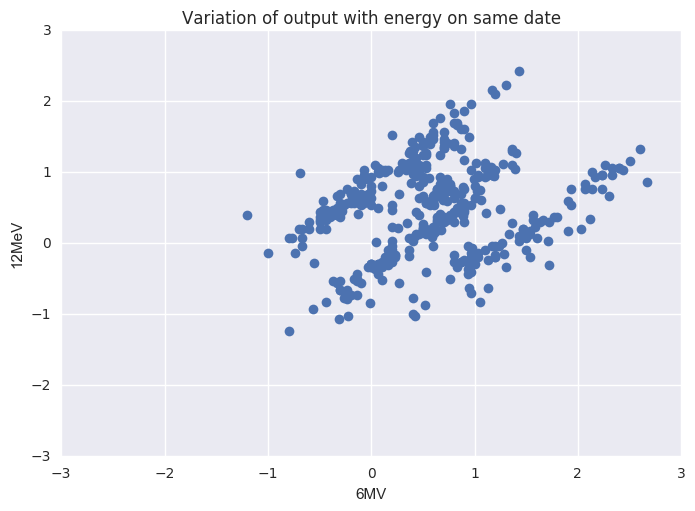

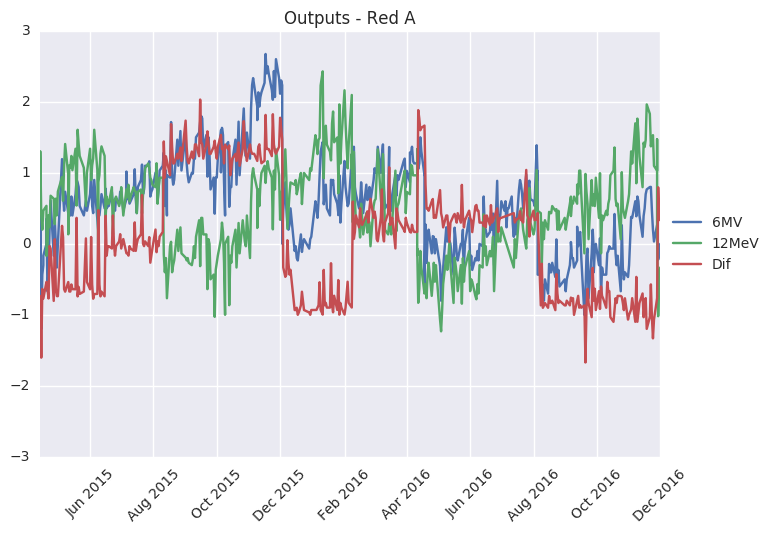

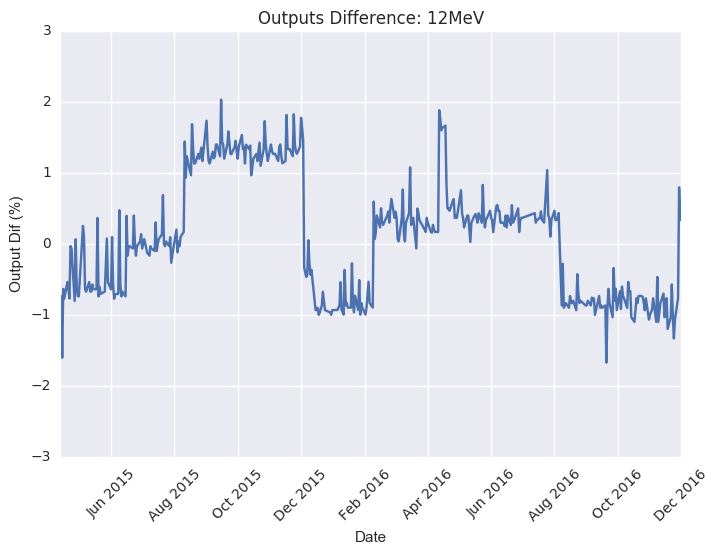

In [390]:
## get dfs containing the matched dates for each energy using created function
comp_list=['6MV','12MeV']
e1,e2 = comp_op_energies(comp_list)

## plot e1 vs e2 in comp_list
plt.plot(e1['Value'],e2['Value'], ls='',marker='o')
plt.xlabel(comp_list[0])
plt.ylabel(comp_list[1])
plt.title('Variation of output with energy on same date')
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.show()

## plot output over time for e1 and e2 in comp_list
for energy in comp_list:
    plt.plot(reda[energy,'Date'],reda[energy,'Value'],label=energy)
plt.plot(e1['Date'],np.array(e1['Value'])-np.array(e2['Value']),label='Dif') #show the differnce between the energies - 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-3,3)
plt.title('Outputs - Red A')
plt.xticks(rotation=45)
plt.show()

## plot difference between the output values
plt.plot(e1['Date'],np.array(e1['Value'])-np.array(e2['Value']))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-3,3)
plt.title('Outputs Difference: ' +comp_list[1])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Output Dif (%)')
plt.show()

### Variation in OP with energy
The output can be seen to vary quite consistently between energies (particularly for photons).
i.e. a change in OP of 1% in 6MV will produce the same for 10MV.
- This is shown visually in the plot of OPa vs OPb which has positive slopes on its line (which change position after a clibration).
- Also seen in the fact that the percentage difference remains consistent (flat line) over time.
- 6MeV is much more irratic and this is clear in the plots.

10MV
12MeV
15MV
16MeV
6MeV
9MeV


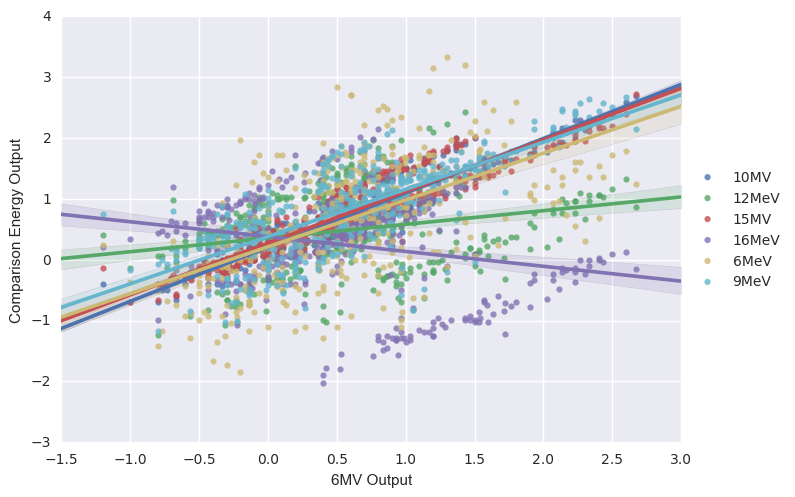

In [373]:
for energy in energies:
    if energy != '6MV':
        print(energy)
        comp_list=['6MV',energy]
        e1,e2 = comp_op_energies(comp_list)
        sns.regplot(e1['Value'],e2['Value'], label=energy)

    #comp_list=['6MV','15MV']
    #e1,e2 = comp_op_energies(comp_list)
    #sns.regplot(e1['Value'],e2['Value'], label='6 vs 15MV')

    #comp_list=['6MV','9MeV']
    #e1,e2 = comp_op_energies(comp_list)
    #sns.regplot(e1['Value'],e2['Value'], label='6 vs 9MeV')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('6MV Output')
plt.ylabel('Comparison Energy Output')


In [383]:
test1 = np.array(e1['Value'])-np.array(e2['Value'])
test1

array([ -1.05530000e+00,  -1.95530000e+00,  -8.27400000e-01,
        -1.05530000e+00,  -8.86700000e-01,  -8.63700000e-01,
        -1.12200000e+00,  -3.59500000e-01,  -2.61000000e-01,
        -1.25070000e+00,  -6.60000000e-03,  -1.01800000e+00,
        -1.22000000e+00,  -1.14900000e+00,   2.50000000e-02,
        -1.45100000e-01,  -1.24130000e+00,  -1.13870000e+00,
        -1.11070000e+00,  -1.20870000e+00,  -1.01200000e+00,
        -1.13930000e+00,  -1.17600000e+00,  -1.23800000e+00,
         1.29500000e-01,  -1.20230000e+00,  -9.73000000e-01,
        -1.01070000e+00,  -1.17600000e+00,  -2.20000000e-01,
        -1.24130000e+00,  -1.10600000e+00,  -1.21300000e-01,
        -1.20770000e+00,  -1.20870000e+00,  -1.23500000e+00,
        -1.11170000e+00,   6.75000000e-02,  -1.07800000e+00,
        -1.33870000e+00,  -1.13900000e+00,  -1.27300000e+00,
         4.10000000e-03,  -4.44900000e-01,  -3.46500000e-01,
        -1.83500000e-01,  -3.41700000e-01,  -1.61000000e-02,
        -2.79800000e-01,

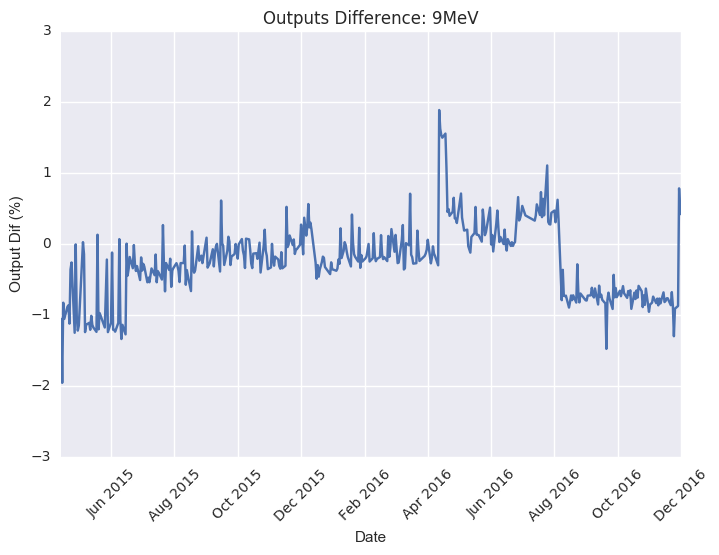

In [386]:
## plot difference between the output values
plt.plot(e1['Date'],np.array(e1['Value'])-np.array(e2['Value']))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-3,3)
plt.title('Outputs Difference: ' +comp_list[1])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Output Dif (%)')
plt.show()